In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

Read the dataset and shows the first 5 rows of the DataFrame to get a glimpse of the data structure and content.

In [4]:
df = pd.read_csv("/content/Guns incident Data.csv")
df.head(5)


,S.No.,Year,Month,Date,Reason,Education,Sex,Age,Race,Hispanic,Place of incident,Police involvement
0,1,2017,1,06-01-2017,Suicide,Bachelors,Male,35.0,Asian/Pacific Islander,100,Home,0
1,2,2017,1,19-01-2017,Suicide,Some college,Female,22.0,White,100,Street,0
2,3,2017,1,01-01-2017,Suicide,Bachelors,Male,61.0,White,100,Other specified,0
3,4,2017,2,06-02-2017,Suicide,Bachelors,Male,65.0,White,100,Home,0
4,5,2017,2,09-02-2017,Suicide,High School,Male,32.0,White,100,Other specified,0


Displays the number of rows and columns in the DataFrame

In [5]:
df.shape


(100798, 12)

Shows the data types of each column. This is important for understanding how to work with the data and identify potential issues

In [6]:
df.dtypes

,0
S.No.,int64
Year,int64
Month,int64
Date,object
Reason,object
Education,object
Sex,object
Age,float64
Race,object
Hispanic,int64


Removes any duplicate rows from the DataFrame.

In [7]:
df = df.drop_duplicates()



In [8]:
df.count()


,0
S.No.,100798
Year,100798
Month,100798
Date,100798
Reason,100798
Education,99376
Sex,100798
Age,100780
Race,100798
Hispanic,100798


Shows the number of non-null values in each column, helping to identify columns with missing data

In [9]:
print(df.isnull().sum())

S.No.                    0
Year                     0
Month                    0
Date                     0
Reason                   0
Education             1422
Sex                      0
Age                     18
Race                     0
Hispanic                 0
Place of incident     1384
Police involvement       0
dtype: int64


Shows the unique values in the 'Education' column. Replace the missing values (NaN) in the 'Education' column with the string 'Other'.

In [10]:
df['Education'].unique()

array(['Bachelors', 'Some college', 'High School',
       'Less than High School', nan], dtype=object)

In [11]:
df['Education'] = df['Education'].fillna('Other')

In [12]:
df['Education'].unique()

array(['Bachelors', 'Some college', 'High School',
       'Less than High School', 'Other'], dtype=object)

Shows the unique values in the 'Place of incident' column.
Replace the missing values (NaN) in the 'Place of incident' column with the string 'Other not specified'.

In [13]:
df['Place of incident'].unique()

array(['Home', 'Street', 'Other specified', nan, 'Other unspecified',
       'Trade/service area', 'Farm', 'Industrial/construction',
       'School/instiution', 'Sports', 'Residential institution'],
      dtype=object)

In [14]:
df['Place of incident'] = df['Place of incident'].fillna('Other not specified')
df['Place of incident'].unique()

array(['Home', 'Street', 'Other specified', 'Other not specified',
       'Other unspecified', 'Trade/service area', 'Farm',
       'Industrial/construction', 'School/instiution', 'Sports',
       'Residential institution'], dtype=object)

Checks for null values again and then drops any rows that still contain null values

In [15]:
print(df.isnull().sum())
df = df.dropna()

S.No.                  0
Year                   0
Month                  0
Date                   0
Reason                 0
Education              0
Sex                    0
Age                   18
Race                   0
Hispanic               0
Place of incident      0
Police involvement     0
dtype: int64


Drop 'S.No.', 'Date', and 'Hispanic' Columns: Removes these columns as they might not be relevant for further analysis or are redundant.

In [16]:
df.drop('S.No.', axis=1, inplace=True)

In [17]:
df.drop('Date', axis=1, inplace=True)

In [18]:
df.drop('Hispanic', axis=1, inplace=True)

Generates a bar plot showing the number of incidents for the top 40 races.

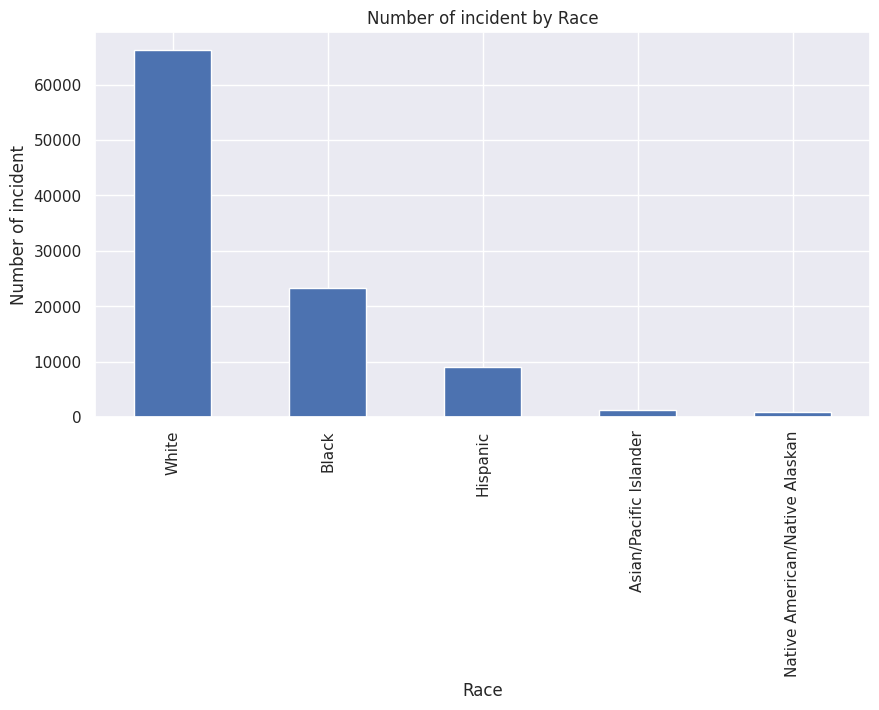

In [19]:
df.Race.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of incident by Race")
plt.ylabel('Number of incident')
plt.xlabel('Race');

Generates a bar plot showing the number of incidents for the top 40 ages

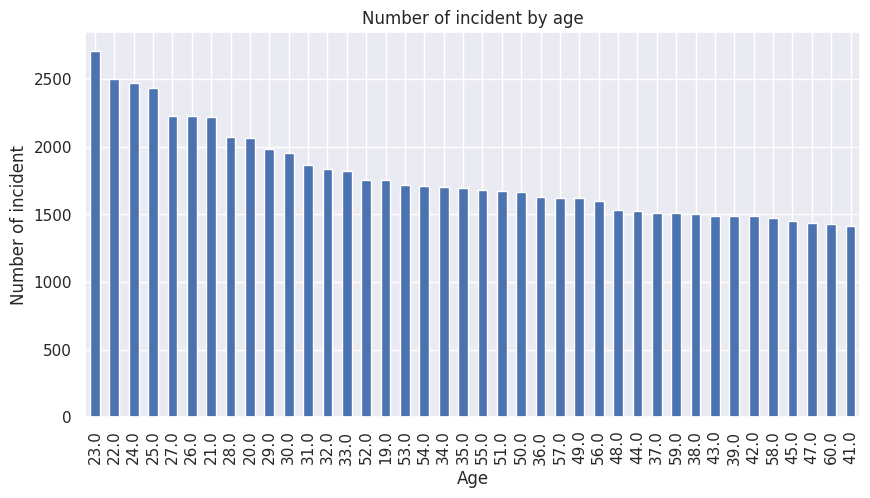

In [20]:
df.Age.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of incident by age")
plt.ylabel('Number of incident')
plt.xlabel('Age');

Generates a bar plot showing the number of incidents by the top reasons.

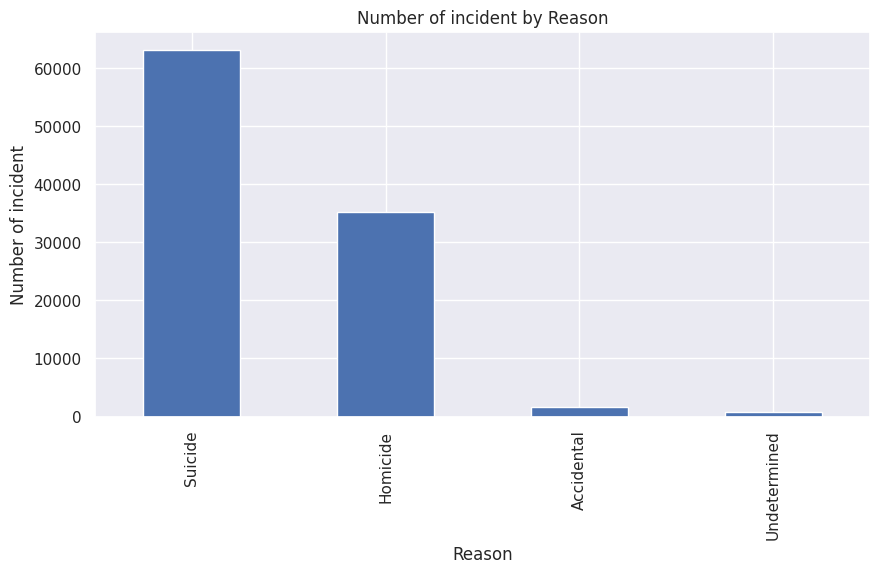

In [21]:
df.Reason.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of incident by Reason")
plt.ylabel('Number of incident')
plt.xlabel('Reason');

Generates a bar plot showing the distribution of incidents by gender

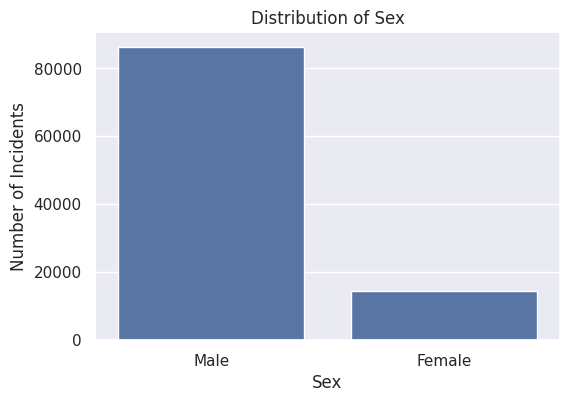

In [24]:
# Visualize the distribution of 'Sex'
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Incidents')
plt.show()

Generates a bar plot showing the distribution of incidents by education level

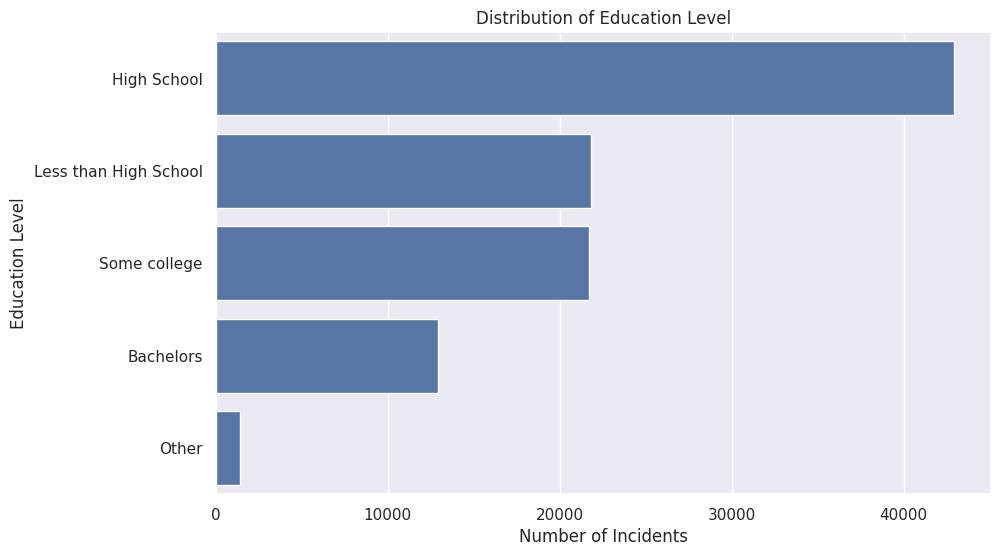

In [25]:
# Visualize the distribution of 'Education'
plt.figure(figsize=(10, 6))
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index)
plt.title('Distribution of Education Level')
plt.xlabel('Number of Incidents')
plt.ylabel('Education Level')
plt.show()

Generates a bar plot showing the distribution of incidents by place of incident

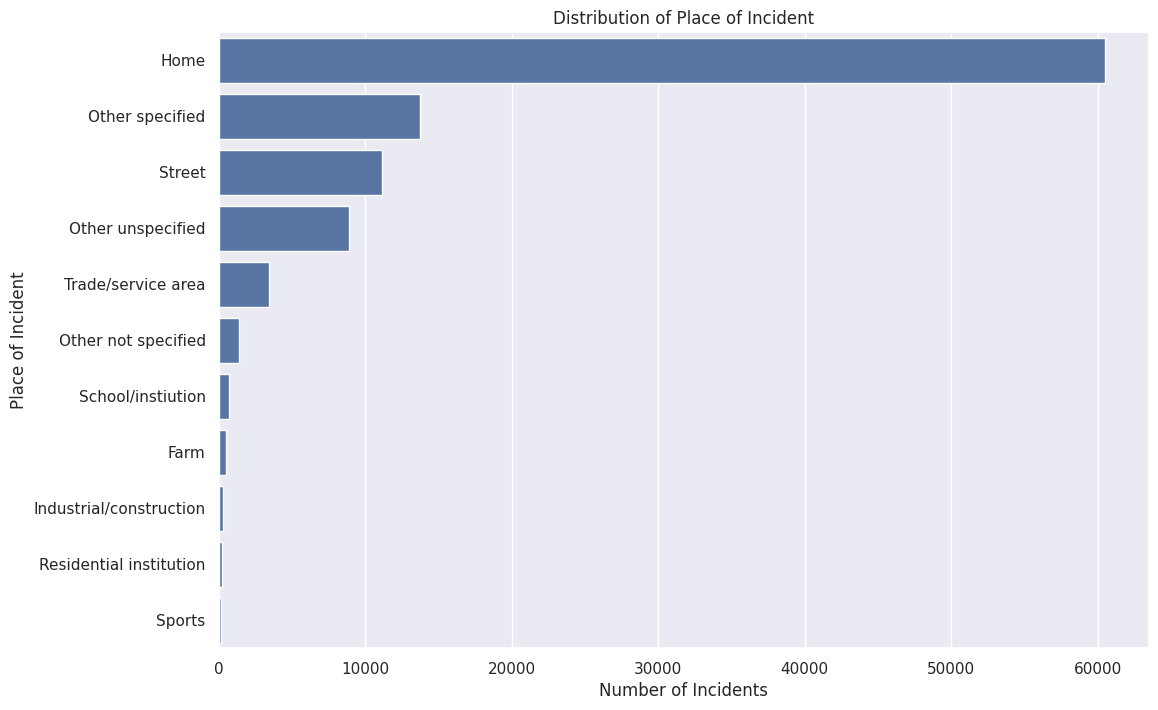

In [26]:
# Visualize the distribution of 'Place of incident'
plt.figure(figsize=(12, 8))
sns.countplot(y='Place of incident', data=df, order=df['Place of incident'].value_counts().index)
plt.title('Distribution of Place of Incident')
plt.xlabel('Number of Incidents')
plt.ylabel('Place of Incident')
plt.show()

### Distribution of Incidents Over Time

Let's examine how the number of incidents changes over the years and months in the dataset.

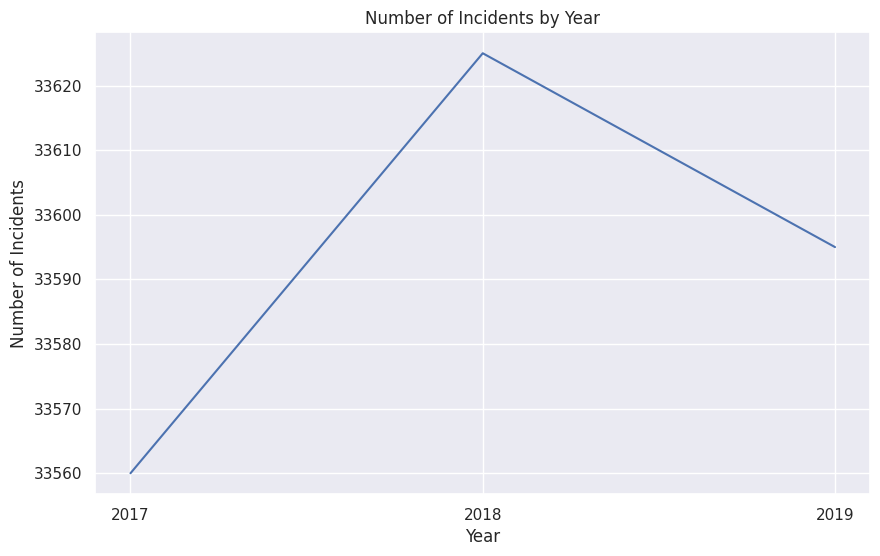

In [28]:
# Group by Year and count incidents
incidents_by_year = df['Year'].value_counts().sort_index()

# Visualize incidents by year
plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_by_year.index, y=incidents_by_year.values)
plt.title('Number of Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(incidents_by_year.index)
plt.grid(True)
plt.show()

The line plot above shows the trend of incidents over the years.

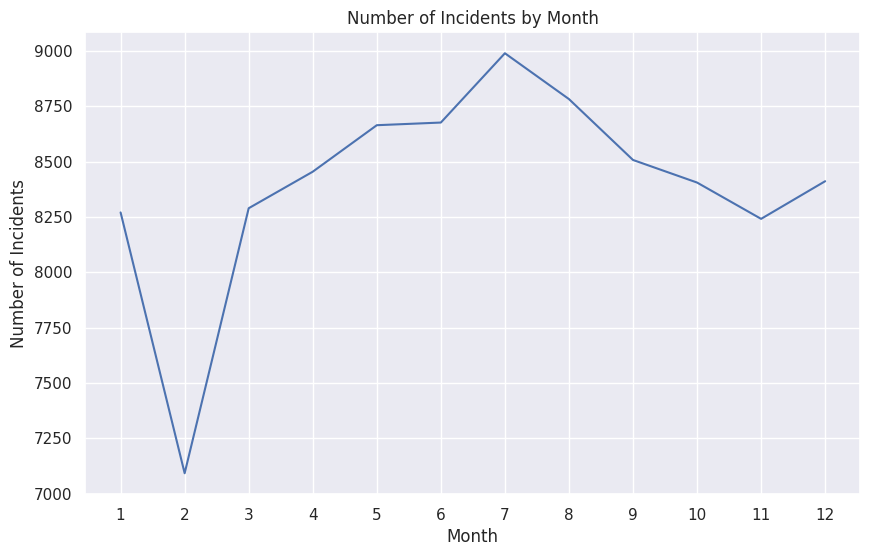

In [29]:
# Group by Month and count incidents
incidents_by_month = df['Month'].value_counts().sort_index()

# Visualize incidents by month
plt.figure(figsize=(10, 6))
sns.lineplot(x=incidents_by_month.index, y=incidents_by_month.values)
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

The line plot above shows the distribution of incidents across the months of the year.